In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("energy.csv", delimiter= ";")
df.columns

Index(['id', 'name', 'geoid', 'geoname', 'value', 'datetime'], dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105888 entries, 0 to 105887
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        105888 non-null  int64  
 1   name      105888 non-null  object 
 2   geoid     0 non-null       float64
 3   geoname   0 non-null       float64
 4   value     105888 non-null  float64
 5   datetime  105888 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ MB


In [4]:
df.describe()

,id,geoid,geoname,value
count,105888.0,0.0,0.0,105888.000000
mean,1013.0,NaN,NaN,113.861658
std,0.0,NaN,NaN,17.051077
min,1013.0,NaN,NaN,56.350000
25%,1013.0,NaN,NaN,104.010000
50%,1013.0,NaN,NaN,114.930000
75%,1013.0,NaN,NaN,125.740000
max,1013.0,NaN,NaN,201.140000


In [5]:
df = df.drop(["id", "geoid", "geoname"], axis = 1)

In [6]:
df["value"] /= 1000 # Para pasar de MW/h a kW/h

In [7]:
df.head()

,name,value,datetime
0,Término de facturación de energía activa del P...,0.09685,2014-06-01T02:00:00+02:00
1,Término de facturación de energía activa del P...,0.09854,2014-06-01T03:00:00+02:00
2,Término de facturación de energía activa del P...,0.09858,2014-06-01T04:00:00+02:00
3,Término de facturación de energía activa del P...,0.09933,2014-06-01T05:00:00+02:00
4,Término de facturación de energía activa del P...,0.10162,2014-06-01T06:00:00+02:00


In [8]:
df["name"].value_counts()

Término de facturación de energía activa del PVPC peaje por defecto    105888
Name: name, dtype: int64

In [9]:
df["datetime"]= pd.to_datetime(df["datetime"], utc= True)

In [10]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["day_of_year"] = df["datetime"].dt.dayofyear

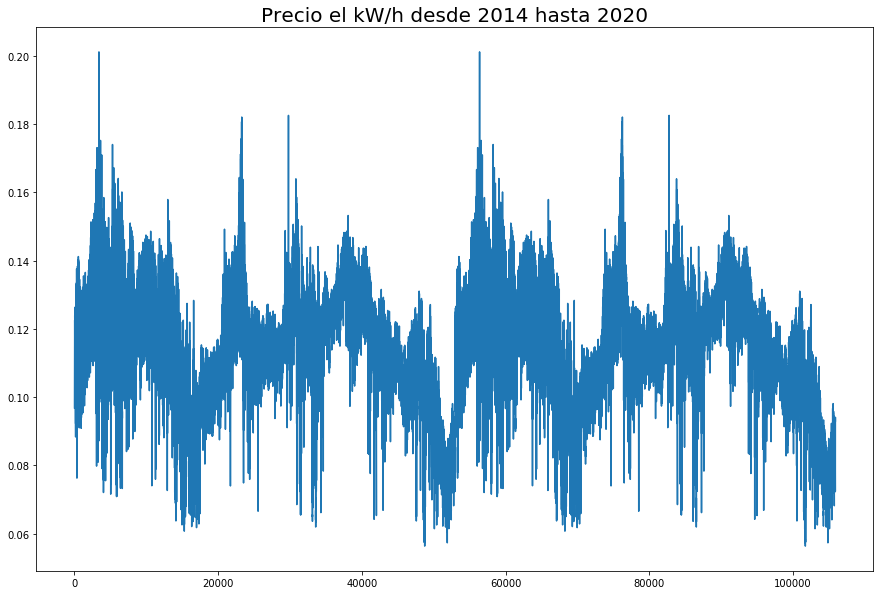

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
ax.set_title("Precio el kW/h desde 2014 hasta 2020", fontsize=20)
ax.plot(range(len(df)), df["value"])

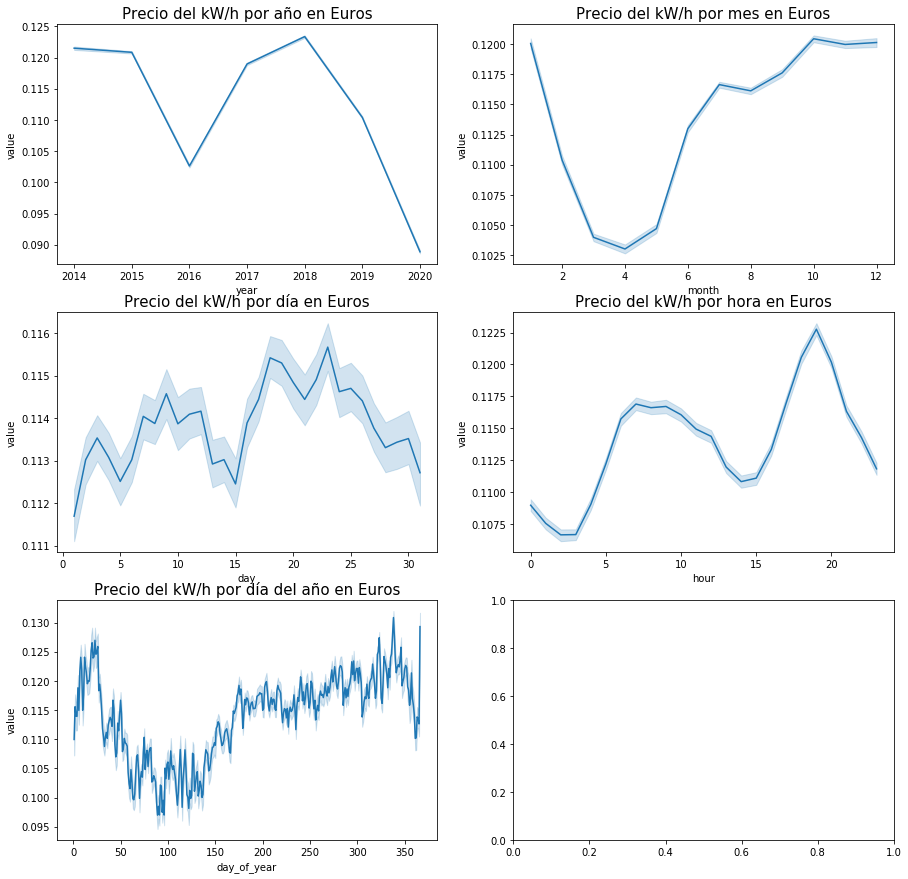

In [12]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
ax[0][0].set_title("Precio del kW/h por año en Euros", fontsize=15)
sns.lineplot(x="year", y="value", data=df, ax= ax[0][0])
ax[0][1].set_title("Precio del kW/h por mes en Euros", fontsize=15)
sns.lineplot(x="month", y="value", data=df, ax= ax[0][1])
ax[1][0].set_title("Precio del kW/h por día en Euros", fontsize=15)
sns.lineplot(x="day", y="value", data=df, ax= ax[1][0])
ax[1][1].set_title("Precio del kW/h por hora en Euros", fontsize=15)
sns.lineplot(x="hour", y="value", data=df, ax= ax[1][1])
ax[2][0].set_title("Precio del kW/h por día del año en Euros", fontsize=15)
sns.lineplot(x="day_of_year", y="value", data=df, ax= ax[2][0])

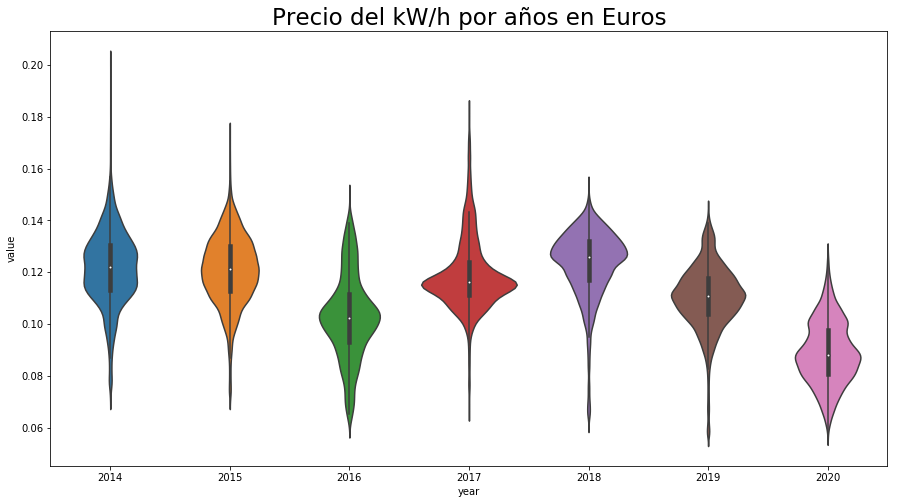

In [13]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
ax.set_title("Precio del kW/h por años en Euros", fontsize=23)
sns.violinplot(x="year", y="value", data=df, ax= ax)

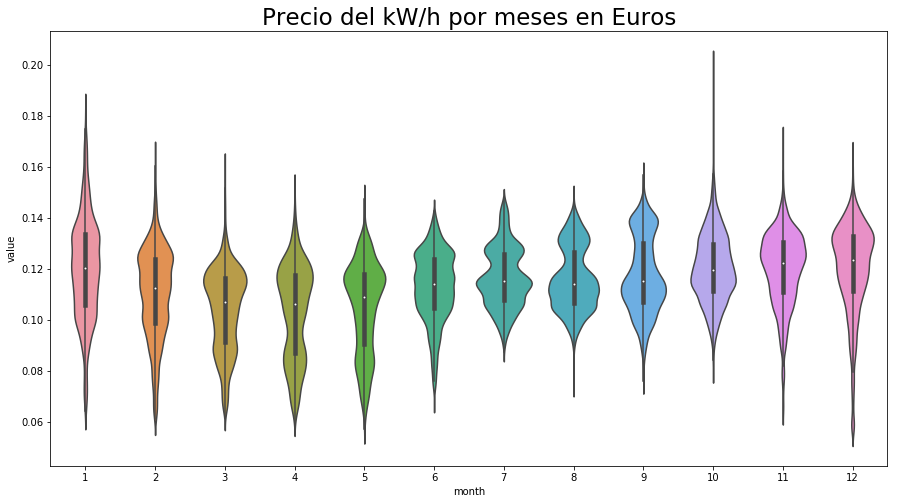

In [14]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
ax.set_title("Precio del kW/h por meses en Euros", fontsize=23)
sns.violinplot(x="month", y="value", data=df, ax= ax)

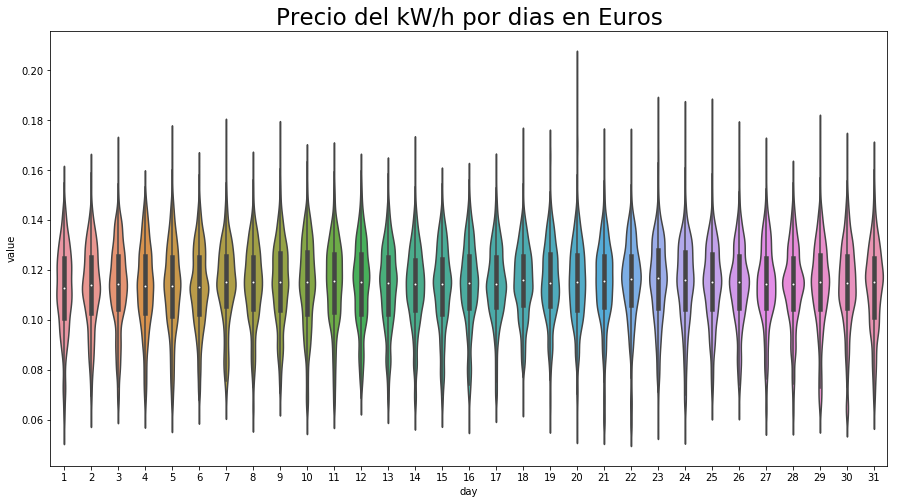

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
ax.set_title("Precio del kW/h por dias en Euros", fontsize=23)
sns.violinplot(x="day", y="value", data=df, ax= ax)

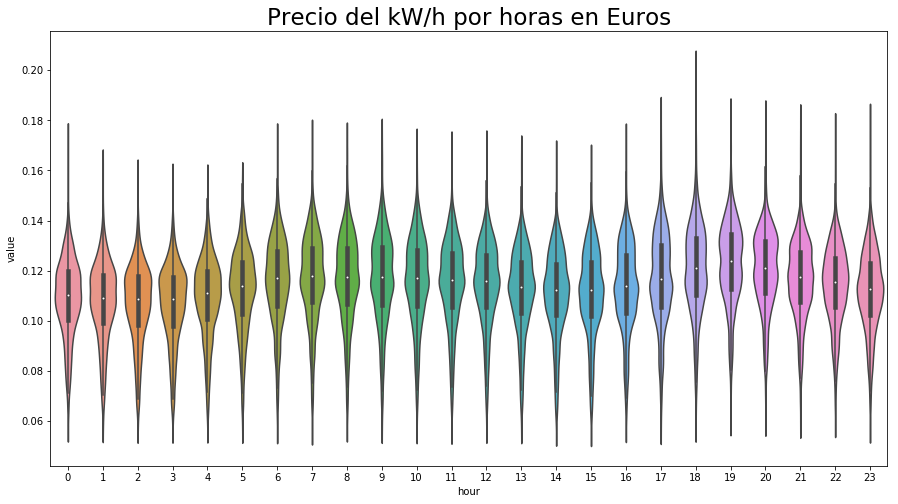

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
ax.set_title("Precio del kW/h por horas en Euros", fontsize=23)
sns.violinplot(x="hour", y="value", data=df, ax= ax)

In [17]:
print("==================================================")
print("Precio del kW/h por años en Euros")
print(df.groupby(["year"])["value"].mean())
print("Desviación típica del precio por años")
print(df.groupby(["year"])["value"].std())
print("Precio mínimo por años")
print(df.groupby(["year"])["value"].min())
print("Precio máximo por años")
print(df.groupby(["year"])["value"].max())
print("==================================================")
print("Precio del kW/h por meses en Euros")
print(df.groupby(["month"])["value"].mean())
print("Desviación típica del precio por meses")
print(df.groupby(["month"])["value"].std())
print("Precio mínimo por meses")
print(df.groupby(["month"])["value"].min())
print("Precio máximo por meses")
print(df.groupby(["month"])["value"].max())
print("==================================================")
print("Precio del kW/h por días en Euros")
print(df.groupby(["day"])["value"].mean())
print("Desviación típica del precio por días")
print(df.groupby(["day"])["value"].std())
print("Precio mínimo por días")
print(df.groupby(["day"])["value"].min())
print("Precio máximo por días")
print(df.groupby(["day"])["value"].max())
print("==================================================")
print("Precio del kW/h por horas en Euros")
print(df.groupby(["hour"])["value"].mean())
print("Desviación típica del precio por horas")
print(df.groupby(["hour"])["value"].std())
print("Precio mínimo por horas")
print(df.groupby(["hour"])["value"].min())
print("Precio máximo por horas")
print(df.groupby(["hour"])["value"].max())

Precio del kW/h por años en Euros
year
2014    0.121498
2015    0.120838
2016    0.102617
2017    0.118970
2018    0.123358
2019    0.110399
2020    0.088875
Name: value, dtype: float64
Desviación típica del precio por años
year
2014    0.014137
2015    0.013173
2016    0.016211
2017    0.013807
2018    0.013076
2019    0.012390
2020    0.012115
Name: value, dtype: float64
Precio mínimo por años
year
2014    0.07157
2015    0.07085
2016    0.06073
2017    0.06657
2018    0.06194
2019    0.05635
2020    0.05731
Name: value, dtype: float64
Precio máximo por años
year
2014    0.20114
2015    0.17401
2016    0.14919
2017    0.18254
2018    0.15321
2019    0.14414
2020    0.12711
Name: value, dtype: float64
Precio del kW/h por meses en Euros
month
1     0.120048
2     0.110389
3     0.103990
4     0.103024
5     0.104711
6     0.112992
7     0.116641
8     0.116125
9     0.117614
10    0.120440
11    0.119968
12    0.120128
Name: value, dtype: float64
Desviación típica del precio por meses
